In [89]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display # For widgets

%matplotlib inline

from io import StringIO 
import re
import gzip 
import urllib.request

In [90]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ibrag\OneDrive\Рабочий стол/netflix_titles.csv')
netflix_m = df[df['type'] == 'Movie']
netflix_m.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [91]:
df = pd.read_csv(r'C:\Users\ibrag\OneDrive\Рабочий стол/netflix_titles.csv')
netflix_m = df[df['type'] == 'TV Show']
netflix_m.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


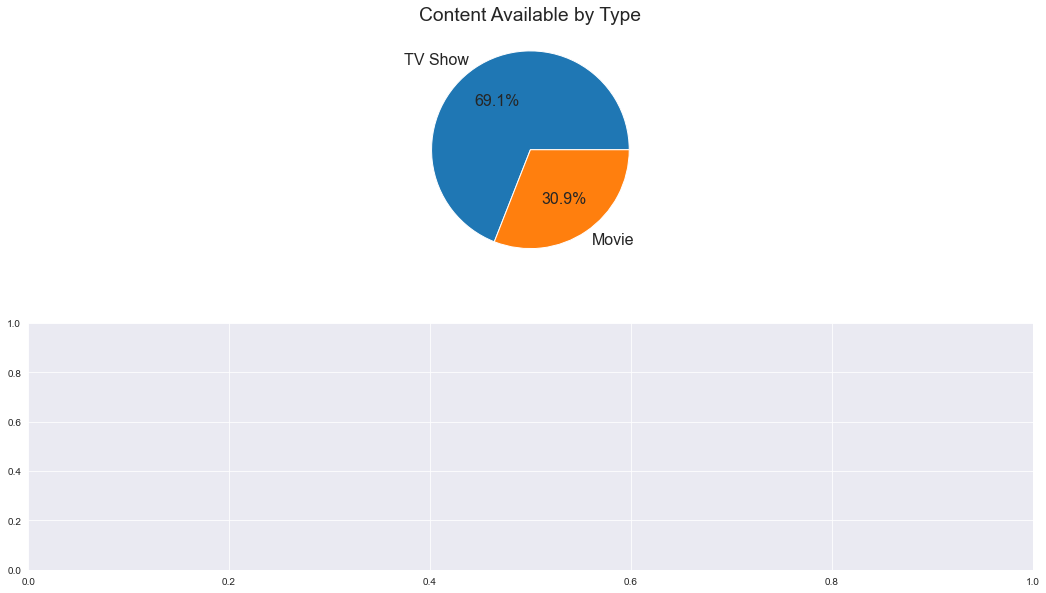

In [92]:
# Общее количество ТВ Шоу и фильмов и процент которое они занимают
import matplotlib.pyplot as plt
import matplotlib
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
matplotlib.rcParams["font.size"] = 16

axes[0].set_title("Content Available by Type")
axes[0].pie(df.groupby("type")["title"].count(), labels=df["type"].unique(), autopct="%1.1f%%",shadow=False);

In [93]:
# Годы в котором вышло большое контентов 
df["year"]= df.date_added.apply(lambda x: str(x).split(",")[-1])
df.year.value_counts() 

 2019    2153
 2020    2009
 2018    1685
 2017    1225
 2016     443
 2021     117
 2015      88
 2014      25
 2011      13
 2013      11
nan        10
 2012       3
 2009       2
 2008       2
 2010       1
Name: year, dtype: int64

In [94]:
# Тут Показанны страны где популярность фильмов на высоте
df.country.value_counts().head()

United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64

C:\Users\ibrag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Страны')

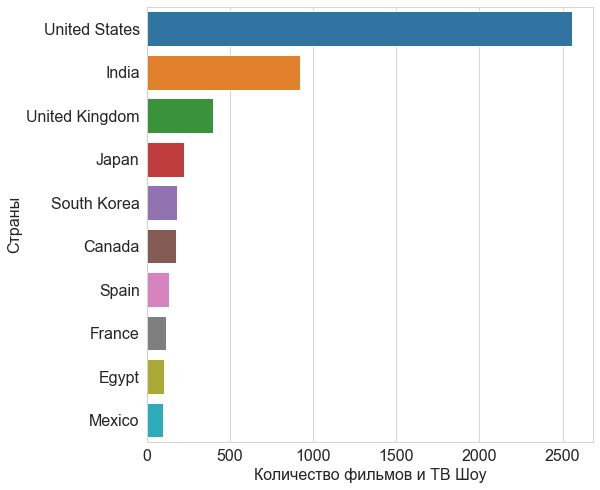

In [95]:
# Тут Показанны страны где популярность фильмов на высоте только с графиком
import seaborn as sns
a= df.country.value_counts().head(10)
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
ax= sns.barplot(a.values,a.index)  # тут мы создаём визуализацию
ax.set_xlabel("Количество фильмов и ТВ Шоу")
ax.set_ylabel("Страны")

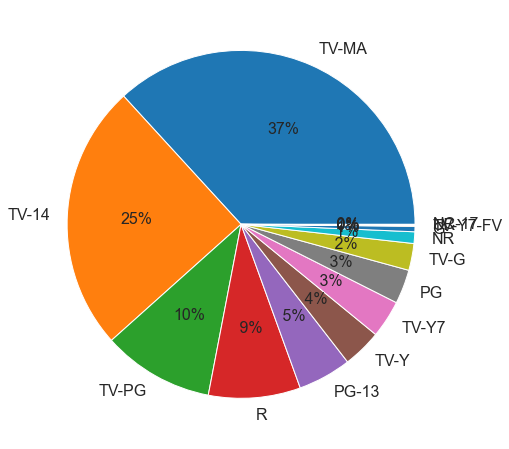

In [97]:
a = df.rating.value_counts()
plt.figure(figsize=(8,8))

labels= list(a.index)
plt.pie(x.values,labels= labels,autopct= "%2.f%%")
plt.show()

In [134]:
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [105]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '00000000'

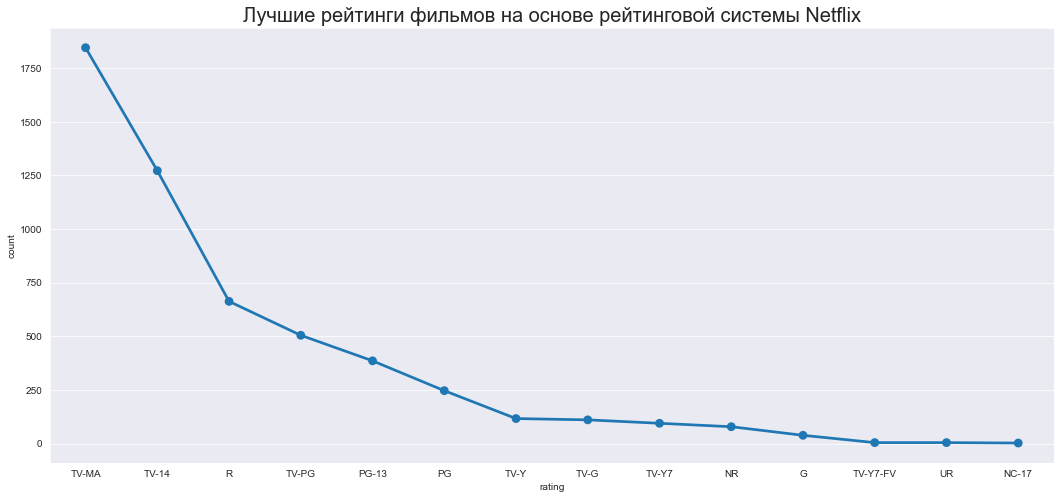

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\ibrag\OneDrive\Рабочий стол/netflix_titles.csv')
df_tv = df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

movie_ratings = df_movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Лучшие рейтинги фильмов на основе рейтинговой системы Netflix',size='20')
plt.show()

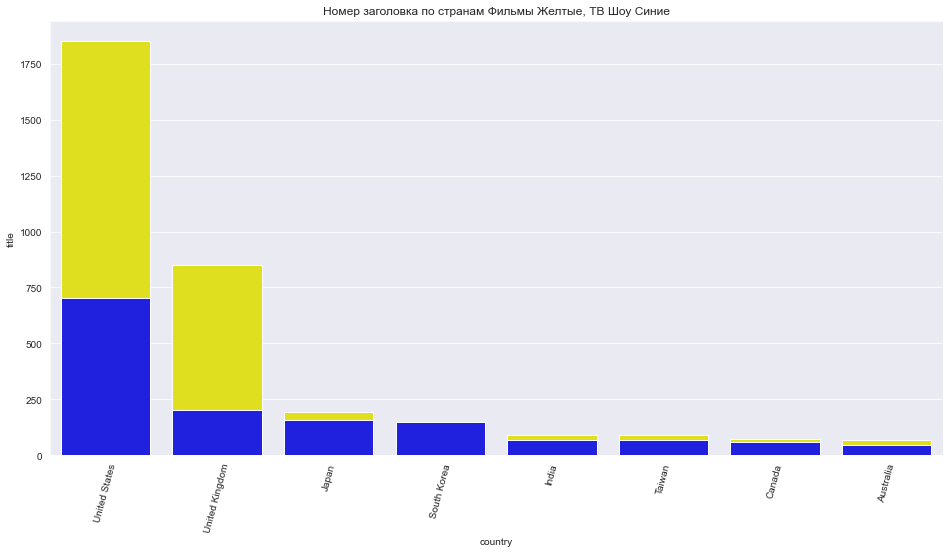

In [140]:
pairplotX = df[df["type"] == "Movie"].groupby('country').count().sort_values('title', ascending=False).reset_index().country.head(8)
pairplotY = df[df["type"] == "Movie"].groupby('country').count().sort_values('title', ascending=False).reset_index().title.head(8)

pairplotX2 = df[df["type"] == "TV Show"].groupby('country').count().sort_values('title', ascending=False).reset_index().country.head(8)
pairplotY2 = df[df["type"] == "TV Show"].groupby('country').count().sort_values('title', ascending=False).reset_index().title.head(8)

plt.figure(figsize=(16, 8))
plt.fontsize = 20
plt.xticks(rotation=75)
plt.title(label='Номер заголовка по странам Фильмы Желтые, ТВ Шоу Синие')
plt.xlabel("Страны")
plt.ylabel("Номер заголовка")
sns.barplot(x=pairplotX, y=pairplotY, color="Yellow");
sns.barplot(x=pairplotX2, y=pairplotY2, color="Blue");

In [166]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [175]:
Directors = df.director.value_counts().sort_values()[-1:-11:-1]
Directors

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Johnnie To                 8
Name: director, dtype: int64

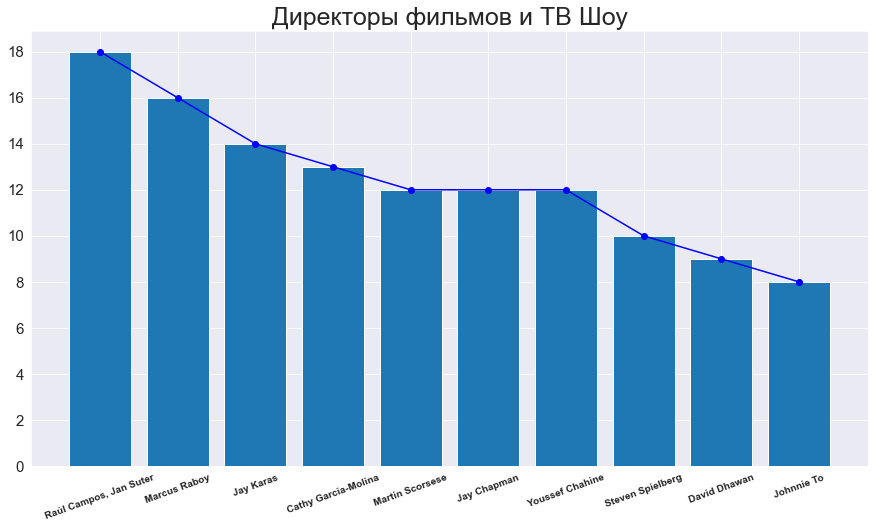

In [178]:
plt.figure(figsize = (15,8))
plt.bar(Directors.index,Directors.values)
plt.plot(Directors.index,Directors.values,marker = "o",color ="b")

plt.xticks(size = 10,weight = "bold",rotation = 20)

plt.yticks([i for i in range(0,19,2)],size = 15)
plt.title("Директоры фильмов и ТВ Шоу",size = 25)
plt.savefig("Директоры фильмов и ТВ Шоу",dpi = 300)
plt.show()

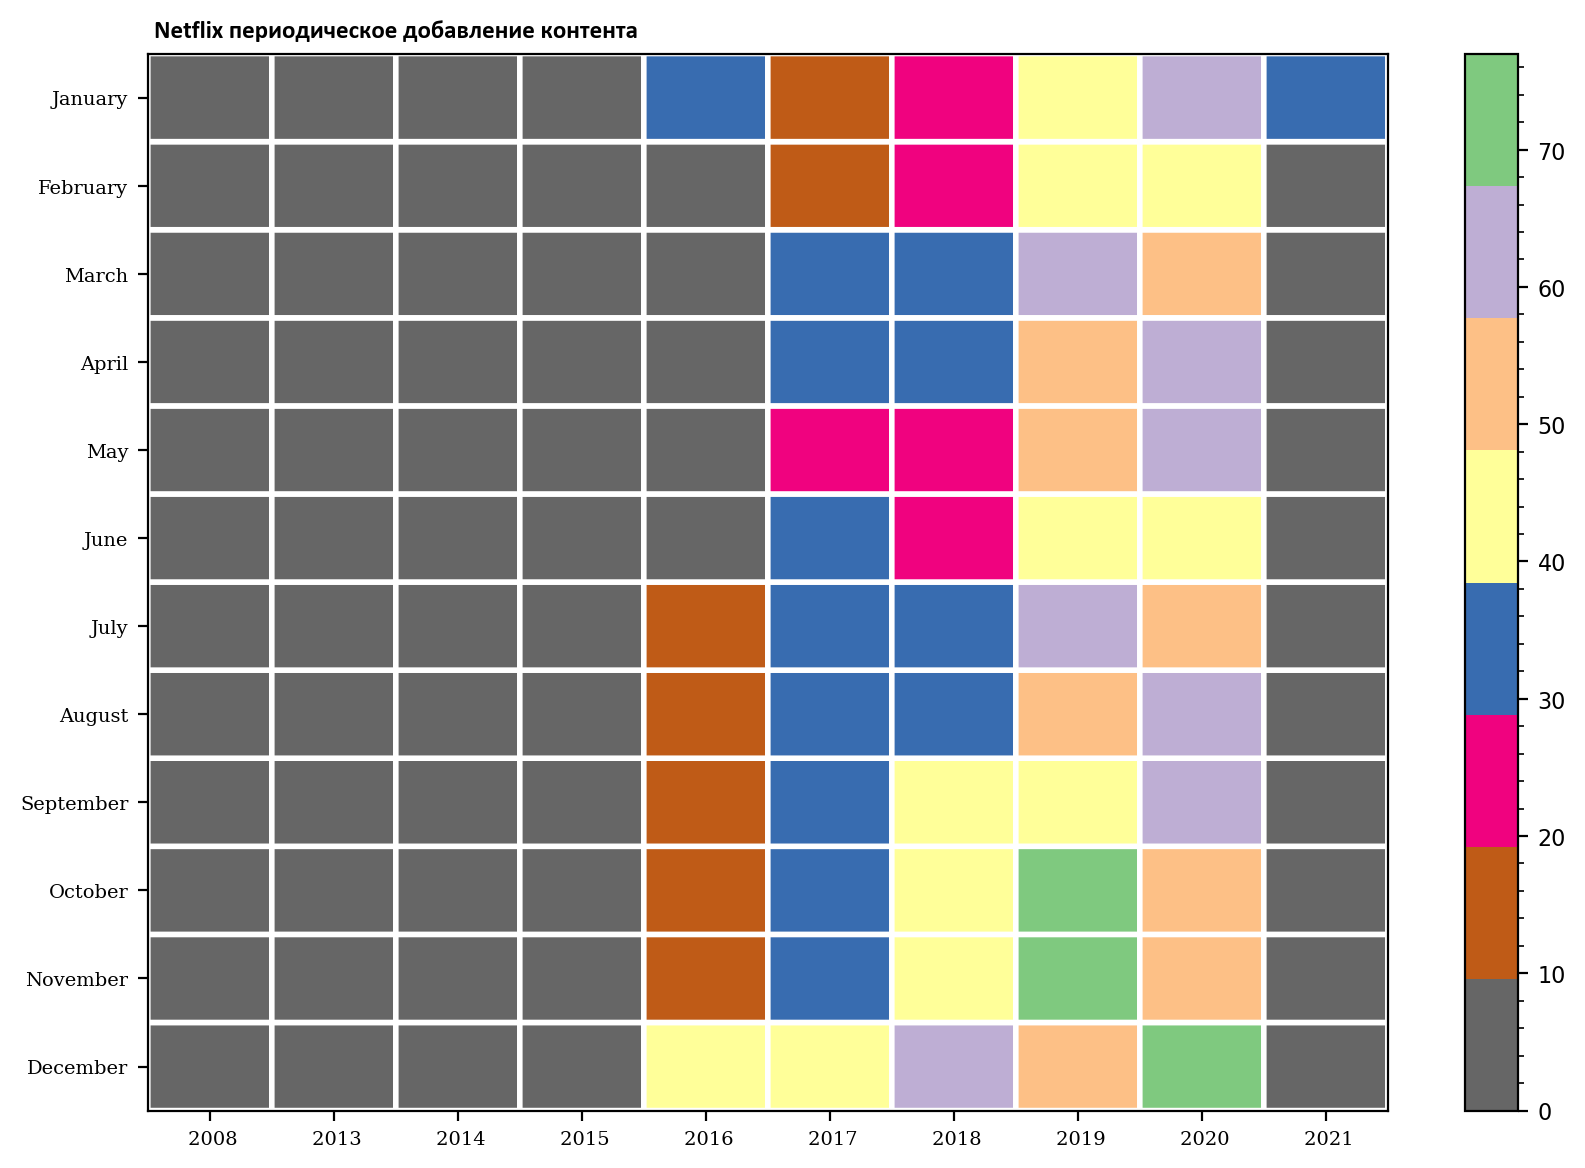

In [236]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

netflix_overall=pd.read_csv(r'C:\Users\ibrag\OneDrive\Рабочий стол/netflix_titles.csv')

netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']

netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(',')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='Accent_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix периодическое добавление контента', fontsize=9, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [233]:
data = pd.read_csv(r'C:\Users\ibrag\OneDrive\Рабочий стол/netflix_titles.csv')

In [166]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

In [230]:
from sklearn.preprocessing import MultiLabelBinarizer 

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"Тут расположенны {len(Types)} типов в Netflix {title} Dataset")    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

<ipython-input-230-ae80667dfc2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))


Тут расположенны 20 типов в Netflix Movie Dataset


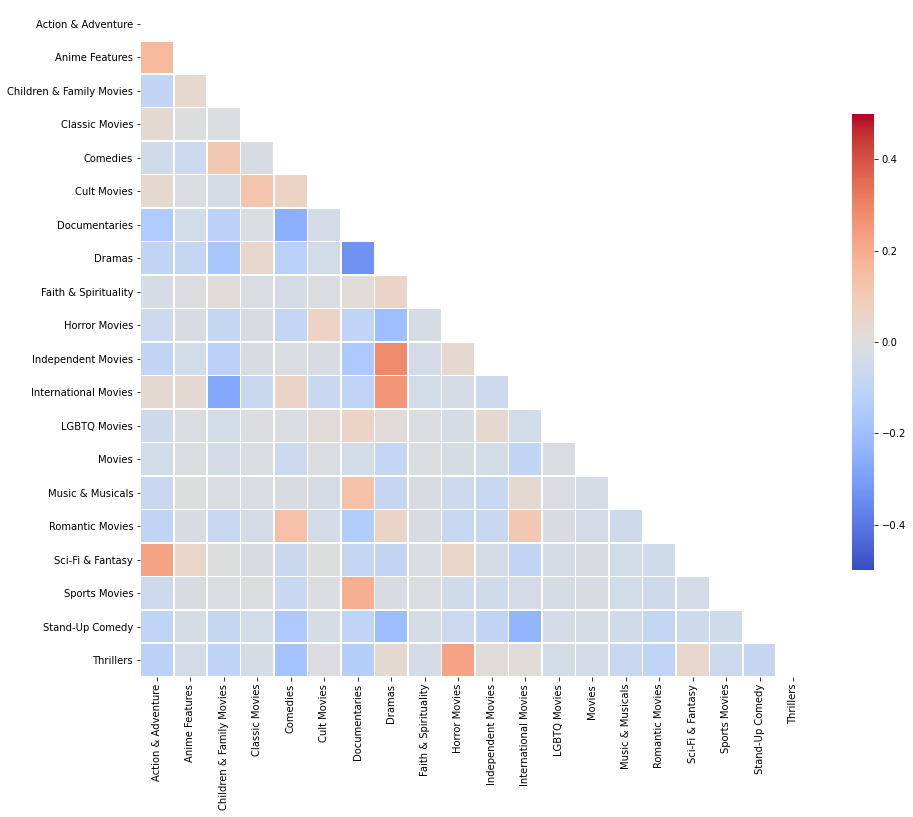

In [231]:
relation_heatmap(movie, 'Movie')

<ipython-input-184-ae80667dfc2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))


Тут расположенны 22 типов в Netflix TV Show Dataset


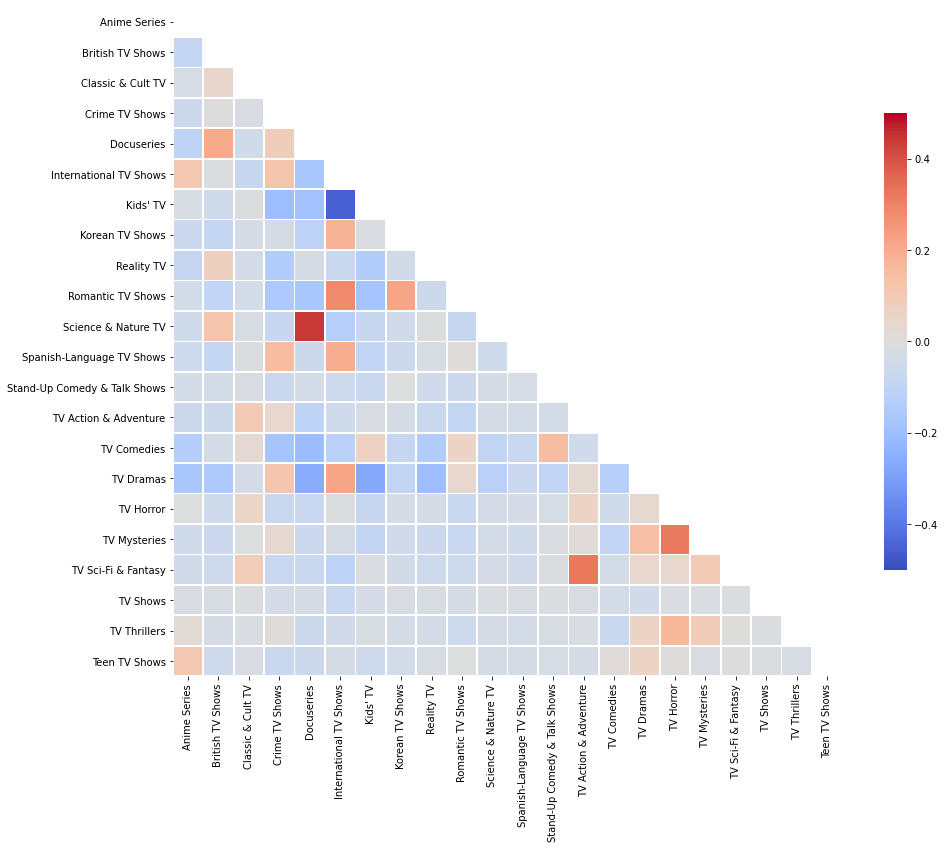

In [186]:
relation_heatmap(tv_show, 'TV Show')

In [182]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

rating_order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = movie['rating'].value_counts()[rating_order]
# tv_rating = tv_show['rating'].value_counts()[rating_order]

In [287]:

def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'orange',  'red',  'grey']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids(0-6)', 'Older Kids(7-13)', 'Teens(13-14)', 'Adults(17+)']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Описание {title} Рейтингов', fontsize=19, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

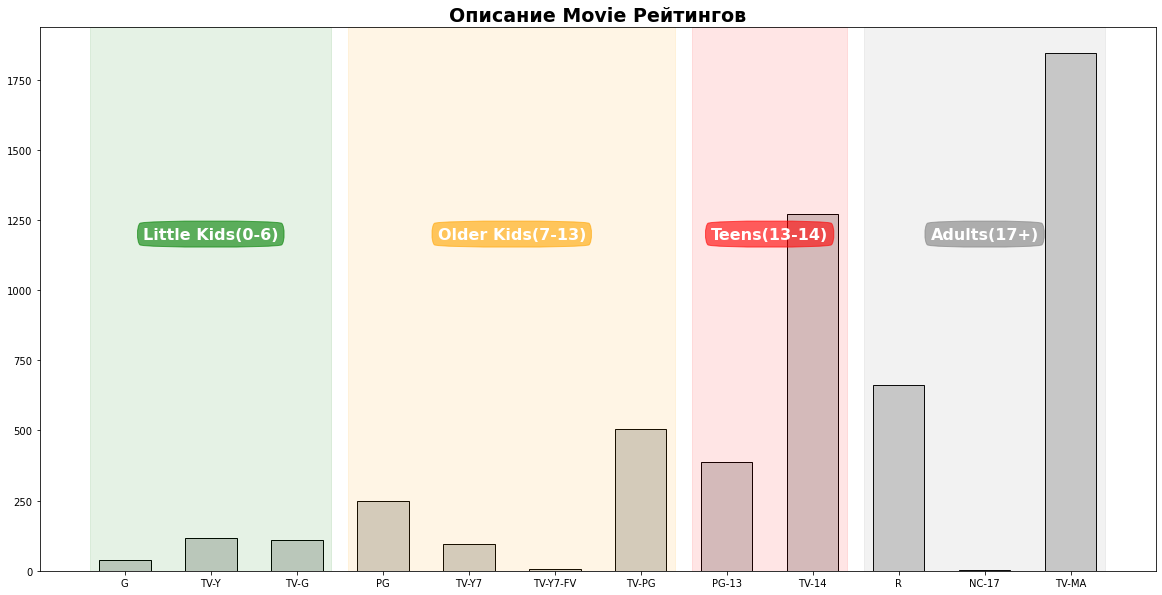

In [288]:
rating_barplot(movie_rating,'Movie', 1200)

In [181]:
# rating_barplot(tv_rating,'TV Show' , 700, 800)

In [238]:
import altair as alt
alt.renderers.enable('kaggle')

rating_data = data[['rating', 'type']].groupby('type')['rating'].value_counts().unstack().fillna(0)[rating_order].T
rating_data = pd.DataFrame(pd.concat([rating_data['Movie'], rating_data['TV Show']])).reset_index().rename(columns={'rating':'rating',0:'cnt'})
rating_data['type'] = rating_data.index  //12

In [239]:
data['tmp'] = 1
base = alt.Chart(rating_data).transform_calculate(
    type=alt.expr.if_(alt.datum.type == 0, 'Фильмы', 'ТВ Шоу')
).properties(
    height=500,
    width=500
)


color_scale = alt.Scale(domain=['Фильмы', 'ТВ Шоу'], range=['skyblue', 'salmon'])

left = base.transform_filter(
    alt.datum.type == 'Фильмы'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q',
            title='население',
            sort=alt.SortOrder('descending')),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Фильмы')

middle = base.encode(
    y=alt.Y('rating', axis=None, sort=rating_order),
    text=alt.Text('rating'),
).mark_text().properties(width=30)

right = base.transform_filter(
    alt.datum.type == 'ТВ Шоу'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q', title='население'),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='ТВ Шоу')

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)

In [187]:
data.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tmp
count,7787,7787,7787,5398,7069,7280,7777,7787.0,7780,7787,7787,7787,7787.0
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769,NaN
top,s2208,Movie,Seis Manos,"Raúl Campos, Jan Suter",David Attenborough,[United States],"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...,NaN
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3,NaN


In [295]:
from sklearn.feature_extraction.text import TfidfVectorizer

netflix_df = data.copy()

# init vectorizer object
tfidf = TfidfVectorizer()

# create tfidf matrix (X in above description)
X = tfidf.fit_transform(netflix_df.description)

print("Форма Матрицы", X.shape)
print("Матрица X:")
print(X)

Форма Матрицы (7787, 18168)
Матрица X:
  (0, 15267)	0.3318784191345226
  (0, 14060)	0.27801411820248484
  (0, 8679)	0.2066608366446566
  (0, 16389)	0.05696710973501862
  (0, 2790)	0.19888728200122263
  (0, 11307)	0.15023743393469452
  (0, 6788)	0.17013844349532684
  (0, 18051)	0.24288847762015517
  (0, 14878)	0.27801411820248484
  (0, 3884)	0.299064044137138
  (0, 6523)	0.21352616031782853
  (0, 5915)	0.22550138095200956
  (0, 11660)	0.26484508962769815
  (0, 8486)	0.21128819132953253
  (0, 796)	0.09350950726832319
  (0, 8220)	0.3070553027151831
  (0, 5233)	0.2094821521710154
  (0, 16201)	0.1602863606198949
  (0, 17688)	0.15701460380597776
  (0, 6598)	0.1921402443883074
  (0, 8078)	0.066389522123311
  (1, 666)	0.2529371823412561
  (1, 15371)	0.2319577516304635
  (1, 4411)	0.26394679902790985
  (1, 16730)	0.20696841524887202
  :	:
  (7785, 6136)	0.1350929765697483
  (7785, 6344)	0.16573593314606988
  (7785, 16198)	0.10330809643882673
  (7785, 16201)	0.046362462514389864
  (7785, 8078)	0

In [274]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(X, X)

# create index lookup on all netflix titles
indices = pd.Series(netflix_df.index, index=netflix_df['title']).drop_duplicates()

In [275]:
def get_tfidf_recommendation(
    title: str, indices: pd.Series, cosine_sim:np.ndarray) -> pd.DataFrame:
    
    # title index lookup 
    idx = indices[title]
    
    # create netflix DataFrame with similarity scores
    scores = pd.DataFrame(
        data={
            "score":cosine_sim[idx],
            "title":netflix_df["title"],
            "description":netflix_df["description"],
        }, 
        index=range(len(cosine_sim[idx]))
    ).sort_values(by="score", ascending=False)
    
    return scores

In [296]:
get_tfidf_recommendation("Friends", indices, cosine_sim)

,score,title,description
2288,1.000000,Friends,This hit sitcom follows the merry misadventure...
3904,0.153450,Manhattan Romance,A filmmaker working on a documentary about lov...
1025,0.150059,BoJack Horseman,Meet the most beloved sitcom horse of the '90s...
2015,0.149433,Episodes,Hoping to create an American version of their ...
5860,0.144449,Studio 54,This documentary follows the rapid rise and fa...
...,...,...,...
2821,0.000000,Hot Girls Wanted: Turned On,Personal stories reveal how the intersection o...
2820,0.000000,Hot Girls Wanted,This 2015 Sundance Film Festival breakout docu...
2818,0.000000,Hot Date,Interconnected sketches and performances skewe...
2817,0.000000,Hot Bot,Two teenage geeks inadvertently find a lifelik...
